In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
# Now we need to read in the data 
df = pd.read_csv(r'C:\Users\Willkommen\Downloads\Friends&Family\Kehinde\Analyst Portfolio Project\Python\movies.csv')


#To show data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#Checking for missing data by looping

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing * 100)))
    
#To replace NaN with 0
df = df.fillna(0)

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [6]:
# Attributes of data in each column

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [5]:
#Changing datatype

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [76]:
#Cleaning Data year/release

df['released'] = df['released'].astype(str).str[:4]


df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,June,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,July,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,June,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,July,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,July,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [77]:
#Sorting data by gross column
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,Dece,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,Apri,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,Dece,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,Dece,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,Apri,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [78]:
#To view all the data in the dataset

pd.set_option('display.max_rows', None)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,June,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,July,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,June,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,July,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,July,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


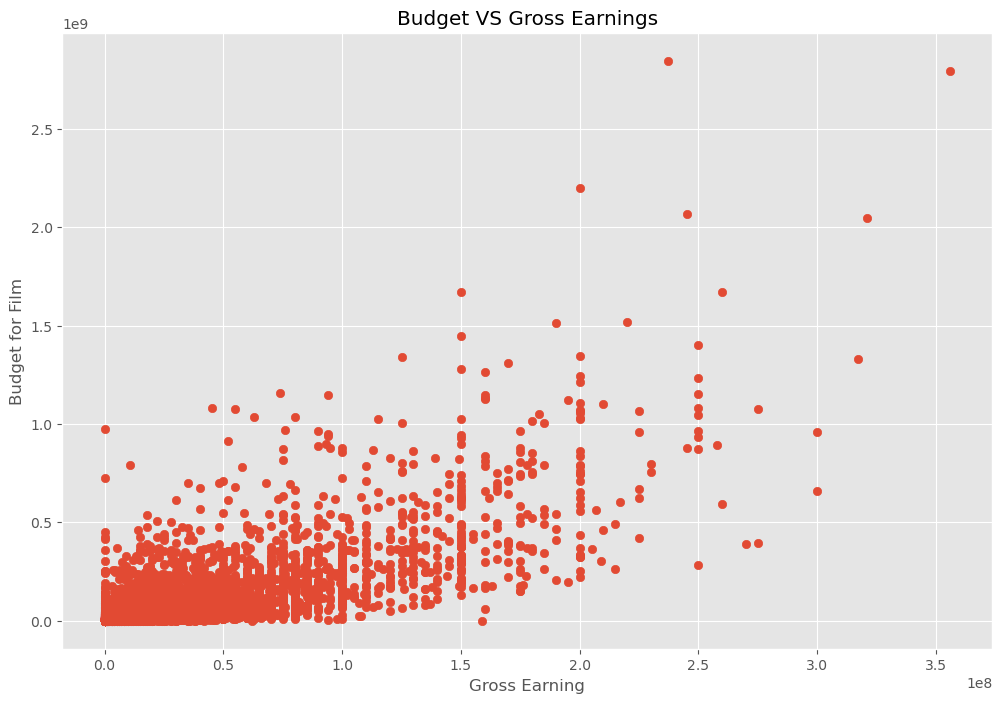

In [13]:
#Budget, Company high correlation

#Scatter plot with budget VS gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget VS Gross Earnings')

plt.xlabel('Gross Earning')

plt.ylabel('Budget for Film')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

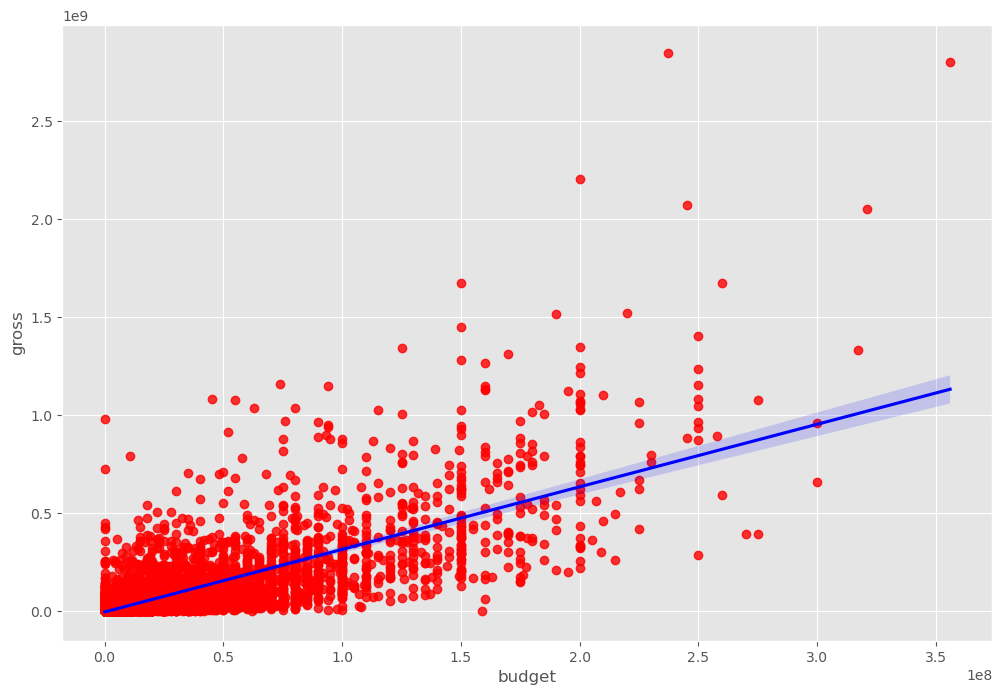

In [53]:
#Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

In [79]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,June,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,July,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,June,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,July,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,July,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


<AxesSubplot:xlabel='score', ylabel='gross'>

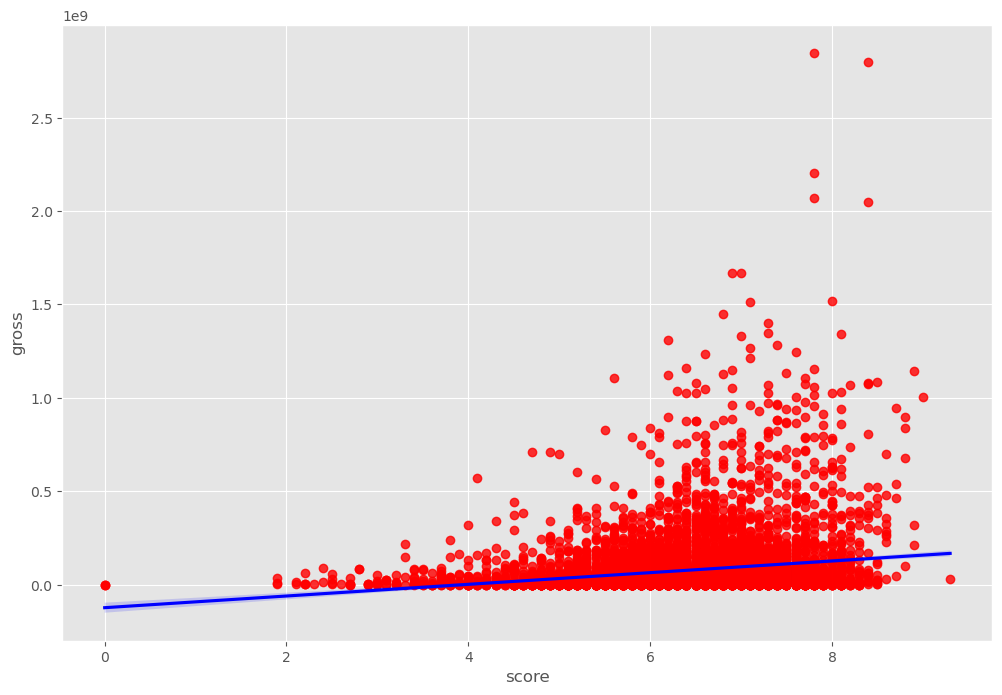

In [54]:
sns.regplot(x='score', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

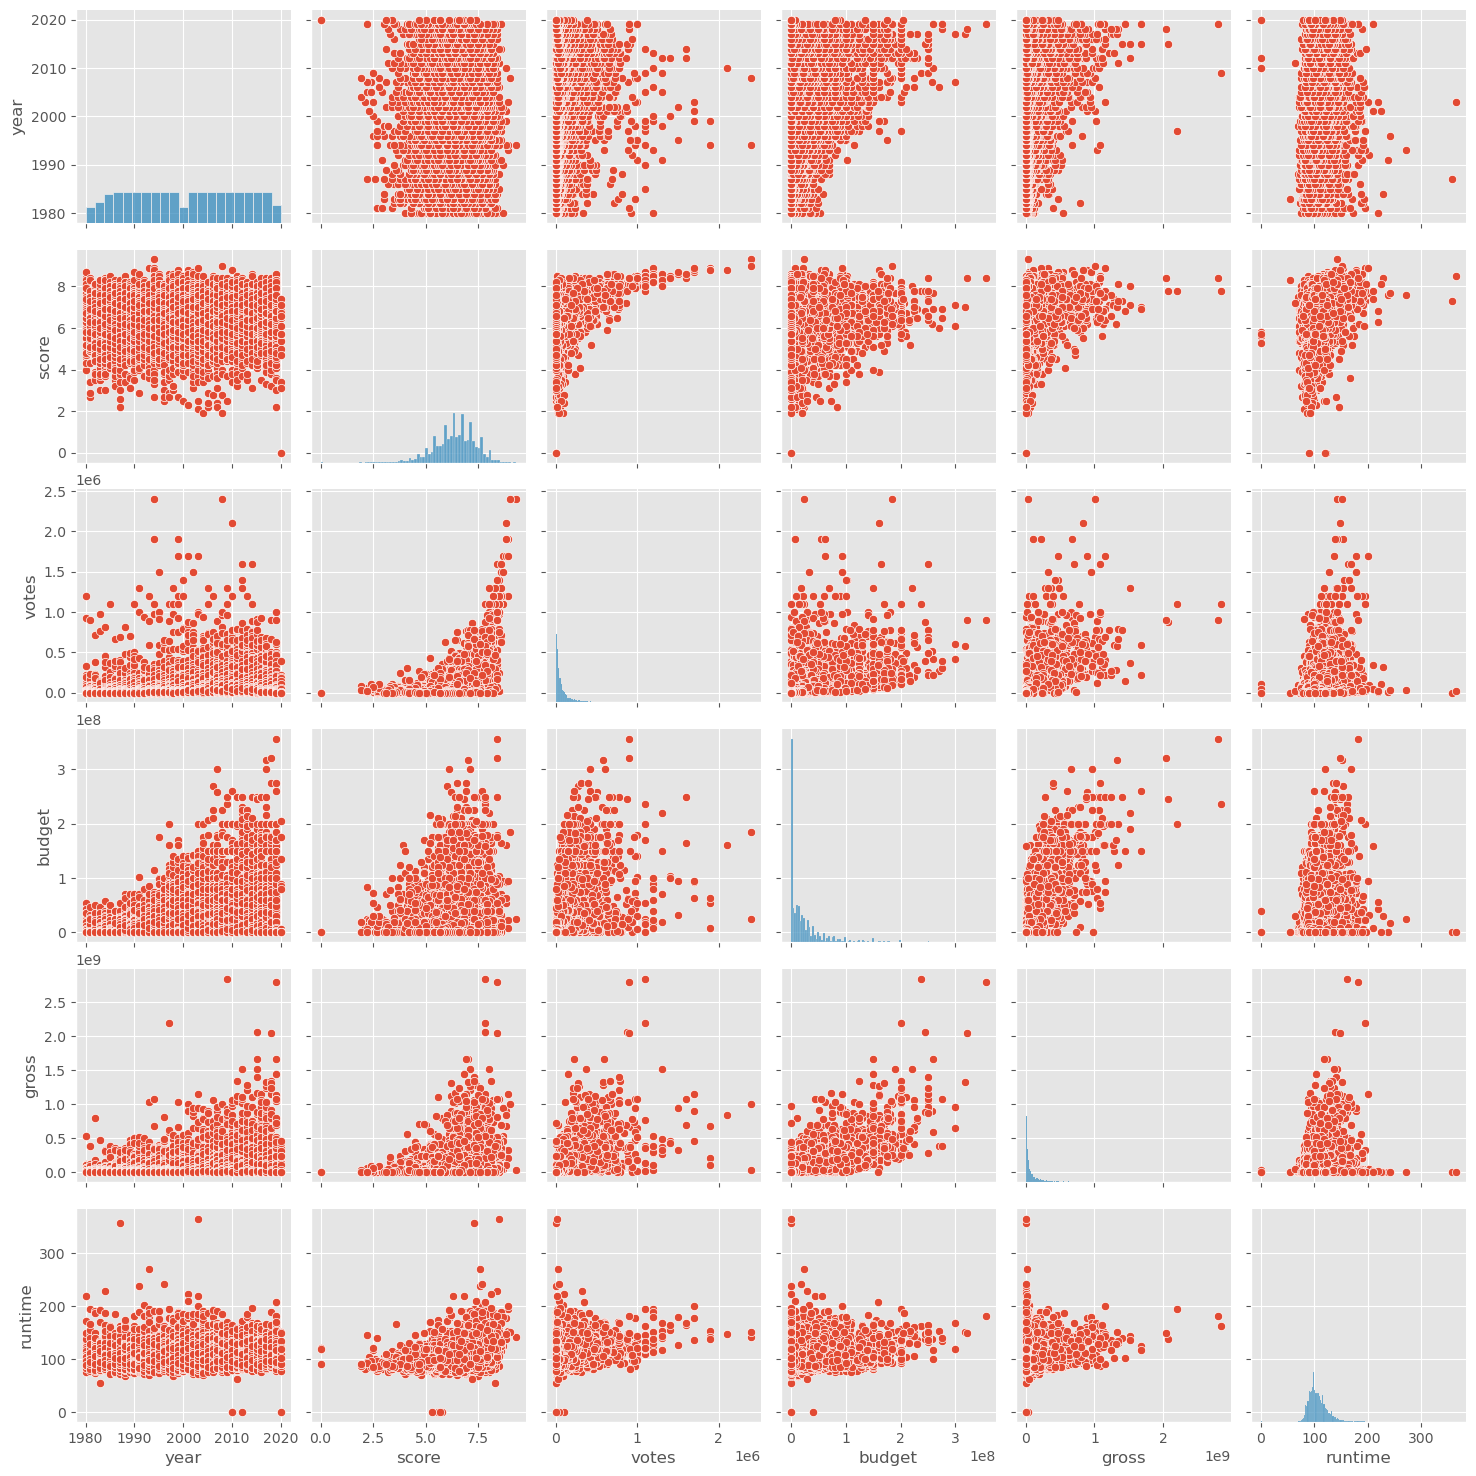

In [58]:
#Let's see looking at correlation #pearson, #kendall, #spearman

sns.pairplot(df)

In [59]:
# Correlation Matrix between all numeric columns 

df.corr(method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


In [60]:
df.corr(method ='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.066796,0.330410,0.209304,0.216595,0.096390
score,0.066796,1.000000,0.300673,-0.004843,0.091331,0.283601
votes,0.330410,0.300673,1.000000,0.439883,0.560449,0.197697
budget,0.209304,-0.004843,0.439883,1.000000,0.541956,0.176184
gross,0.216595,0.091331,0.560449,0.541956,1.000000,0.177429
runtime,0.096390,0.283601,0.197697,0.176184,0.177429,1.000000


In [61]:
df.corr(method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097757,0.468107,0.291152,0.314681,0.141805
score,0.097757,1.000000,0.428810,-0.007002,0.133564,0.399868
votes,0.468107,0.428810,1.000000,0.604693,0.752550,0.289359
budget,0.291152,-0.007002,0.604693,1.000000,0.716816,0.246941
gross,0.314681,0.133564,0.752550,0.716816,1.000000,0.257478
runtime,0.141805,0.399868,0.289359,0.246941,0.257478,1.000000


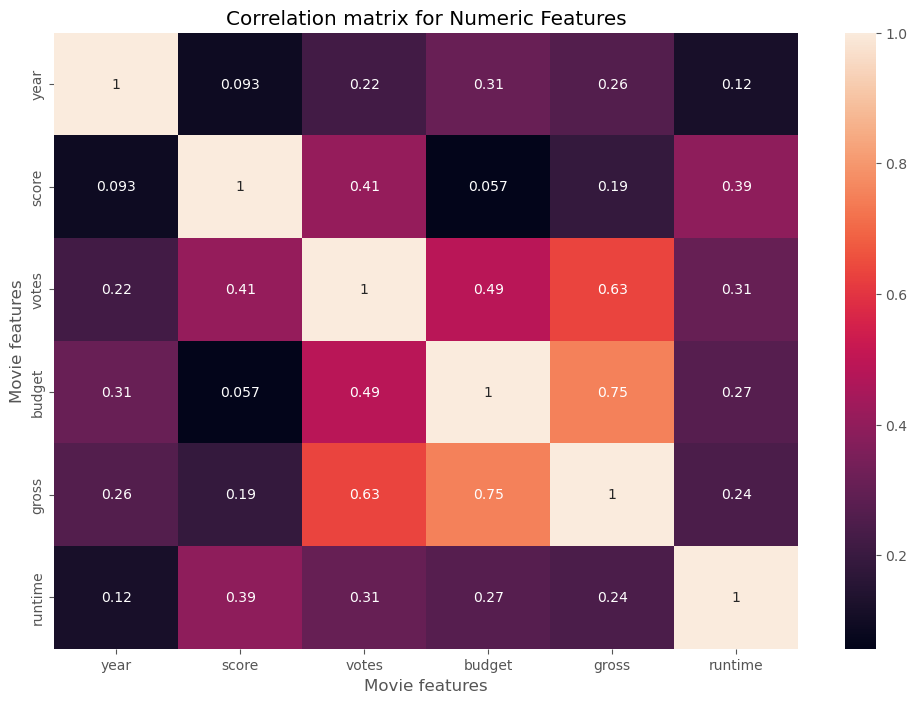

In [62]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [63]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.154269,0.036367,0.965761,0.005512,-0.042806,0.290143,0.745905,0.805801,0.731509,0.144960,0.275691,0.947540,0.591834,0.052214
rating,0.154269,1.000000,-0.091898,0.166475,-0.022117,0.011934,0.103921,0.098462,0.115812,0.107458,0.020296,0.186280,0.161545,-0.011014,0.037071
genre,0.036367,-0.091898,1.000000,0.037184,-0.006096,-0.004334,0.021797,0.047288,0.033933,0.038918,-0.015182,0.069445,0.038635,0.009203,0.000442
year,0.965761,0.166475,0.037184,1.000000,0.002813,-0.041029,0.314745,0.770497,0.825351,0.756341,0.142259,0.298022,0.981090,0.601720,0.053816
released,0.005512,-0.022117,-0.006096,0.002813,1.000000,0.029220,-0.049008,0.007811,0.016988,0.019917,0.023328,-0.086298,-0.001561,0.058722,-0.028743
score,-0.042806,0.011934,-0.004334,-0.041029,0.029220,1.000000,-0.005335,-0.020344,-0.030743,-0.005082,0.022484,-0.009946,-0.050456,-0.027604,0.029090
votes,0.290143,0.103921,0.021797,0.314745,-0.049008,-0.005335,1.000000,0.193607,0.226874,0.182897,-0.046373,0.395999,0.283068,0.009550,0.109088
director,0.745905,0.098462,0.047288,0.770497,0.007811,-0.020344,0.193607,1.000000,0.748875,0.682358,0.157134,0.108033,0.751149,0.552420,-0.007714
writer,0.805801,0.115812,0.033933,0.825351,0.016988,-0.030743,0.226874,0.748875,1.000000,0.676284,0.158919,0.186522,0.806367,0.547126,0.035239
star,0.731509,0.107458,0.038918,0.756341,0.019917,-0.005082,0.182897,0.682358,0.676284,1.000000,0.184619,0.110894,0.735844,0.527363,0.039668


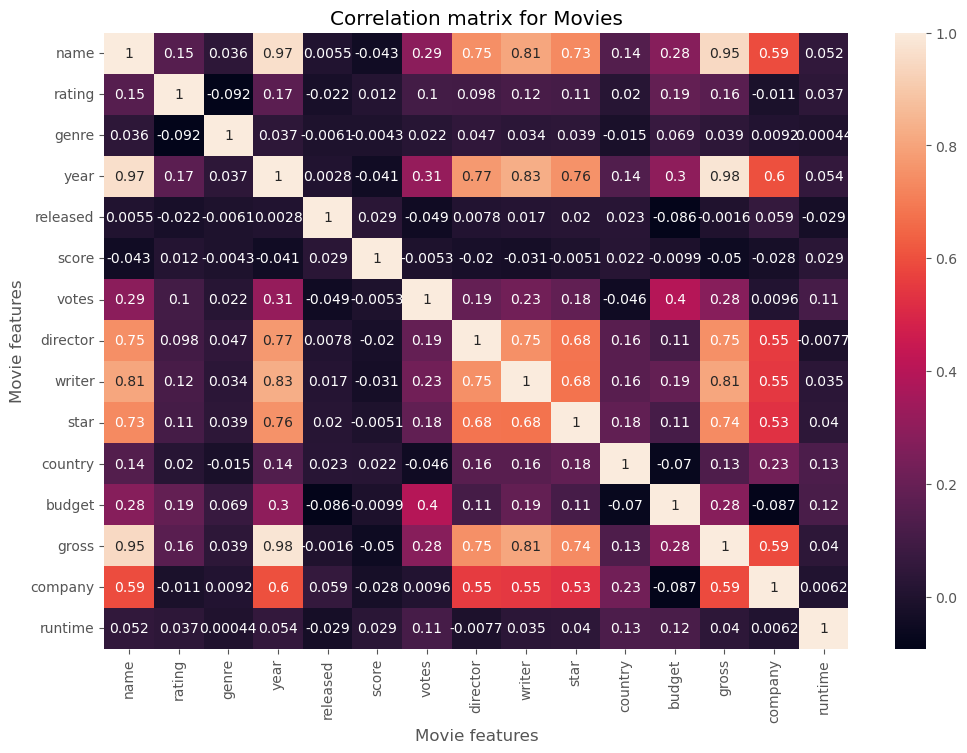

In [64]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()


In [65]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name      name        1.000000
          rating      0.154269
          genre       0.036367
          year        0.965761
          released    0.005512
          score      -0.042806
          votes       0.290143
          director    0.745905
          writer      0.805801
          star        0.731509
          country     0.144960
          budget      0.275691
          gross       0.947540
          company     0.591834
          runtime     0.052214
rating    name        0.154269
          rating      1.000000
          genre      -0.091898
          year        0.166475
          released   -0.022117
          score       0.011934
          votes       0.103921
          director    0.098462
          writer      0.115812
          star        0.107458
          country     0.020296
          budget      0.186280
          gross       0.161545
          company    -0.011014
          runtime     0.037071
genre     name        0.036367
          rating     -0.091898
        

In [66]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre     rating     -0.091898
rating    genre      -0.091898
company   budget     -0.087490
budget    company    -0.087490
released  budget     -0.086298
budget    released   -0.086298
          country    -0.069766
country   budget     -0.069766
gross     score      -0.050456
score     gross      -0.050456
votes     released   -0.049008
released  votes      -0.049008
votes     country    -0.046373
country   votes      -0.046373
score     name       -0.042806
name      score      -0.042806
year      score      -0.041029
score     year       -0.041029
writer    score      -0.030743
score     writer     -0.030743
runtime   released   -0.028743
released  runtime    -0.028743
company   score      -0.027604
score     company    -0.027604
rating    released   -0.022117
released  rating     -0.022117
director  score      -0.020344
score     director   -0.020344
country   genre      -0.015182
genre     country    -0.015182
rating    company    -0.011014
company   rating     -0.011014
score   

In [74]:
# We can now take a look at the ones that have a high correlation (> 0.5)

high_corr = sorted_pairs[abs(sorted_pairs) > 0.5]

print(high_corr)

company   star        0.527363
star      company     0.527363
writer    company     0.547126
company   writer      0.547126
director  company     0.552420
company   director    0.552420
          gross       0.587945
gross     company     0.587945
name      company     0.591834
company   name        0.591834
          year        0.601720
year      company     0.601720
writer    star        0.676284
star      writer      0.676284
          director    0.682358
director  star        0.682358
name      star        0.731509
star      name        0.731509
          gross       0.735844
gross     star        0.735844
director  name        0.745905
name      director    0.745905
writer    director    0.748875
director  writer      0.748875
gross     director    0.751149
director  gross       0.751149
star      year        0.756341
year      star        0.756341
          director    0.770497
director  year        0.770497
name      writer      0.805801
writer    name        0.805801
gross   

In [68]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [69]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                                            year            
0                                                  1983     5563663
                                                   1984     2687148
                                                   1986     3102082
                                                   1989     6693304
                                                   1990     1510053
                                                   2010           0
                                                   2019      103047
                                                   2020    25818882
"DIA" Productions GmbH & Co. KG                    2003    44350926
"Weathering With You" Film Partners                2019   193457467
.406 Production                                    1996       10580
1+2 Seisaku Iinkai                                 2000     1196218
10 West Studios                                    2010      814906
120 Films                                          2002     6479328
120dB Films                                        2009       26676
                                                   2016      368372
13 Productions                                     2000       25461
1492 Pictures                                      1996   129832389
                                                   1999    87423861
1818 Productions                                   1983    12232628
19 Entertainment                                   2003     4928883
1978 Films                                         2017    40656399
1984 Private Defense Contractors                   2014    58834384
1992 Number Four Limited Partnership               1995     4686937
2 Loop Films                                       2002      264349
2.0 Entertainment                                  2019   122810399
2.4.7. Films                                       2007    22783978
2003 Productions                                   2004    69424389
20th Century Studios                               2020   111105497
21 Laps Entertainment                              2014    41296320
                                                   2018    41142379
21st Century Film Corporation                      1989     3953745
                                                   1990     7658401
21st Century Films                                 1994     1702394
25th Hour Productions                              2002    23932055
26 Films                                           2009    20458873
2929 Productions                                   2007     7248490
                                                   2008    28705178
                                                   2014     5092129
2DUX²                                              2016      678150
                                                   2018   197744377
3 Arts Entertainment                               1996    60209334
                                                   1997    75812433
                                                   2001    71186502
                                                   2010      649626
                                                   2013     3909596
                                                   2014   161459297
                                                   2015    36606743
                                                   2019    22386555
3 Miles Apart Productions Ltd.                     1999     8408835
3311 Productions                                   2013     3114953
                                                   2017     5042014
360 Pictures                                       2007     9669758
391 Productions                                    1998     1960216
                                                   1999       92442
3B Productions                                     1999           0
                                                   2003      167999
3Mark Entertainment                               

In [70]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

In [71]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

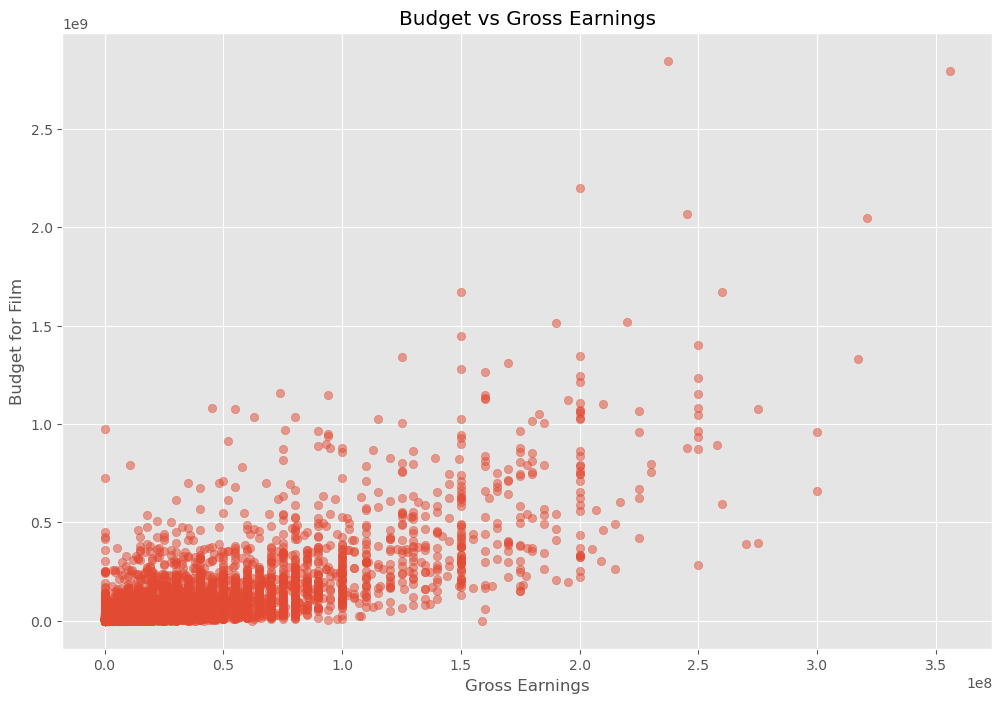

In [72]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()